In [3]:
import pandas as pd
import requests
import os
import json
import re
import numpy as np
%matplotlib inline
import matplotlib.ticker as ticker
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns

# Gather Data 


### 1-The WeRateDogs Twitter archive csv file : twitter-archive-enhanced .csv    (archive_df)


In [6]:
archive_df=pd.read_csv('twitter-archive-enhanced .csv')

### 2-The tweet image predictions   (image_predictions_df)

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
file_name='image-predictions.tsv'
if not os.path.isfile(file_name) :
    with open(file_name,mode='wb') as file :
        file.write(response.content)
image_predictions_df=pd.read_csv(file_name,sep='\t')      


### 3-Twitter's API for additional data  (api_df)

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [8]:
#read from json file line by lue
df_list=[]
with open ('tweet-json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        fav_count=tweet['favorite_count']
        user_count=tweet['user']['followers_count']
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count':retweet_count,
                        'fav_count':fav_count,
                        'user_count':user_count})
                      
api_df=pd.DataFrame(df_list)   


# Assess Data

In [9]:
archive_df.sample(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1750,679001094530465792,NaN,NaN,2015-12-21 18:10:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rascal. He's paddling an imaginary can...,NaN,NaN,NaN,https://vine.co/v/iKIwAzEatd6,11,10,Rascal,None,None,None,None
714,784057939640352768,NaN,NaN,2016-10-06 15:49:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Balto. He's very content. Legendary to...,NaN,NaN,NaN,https://vine.co/v/5gKxeUpuKEr,12,10,Balto,None,None,None,None
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667160273...,11,10,Bradlay,None,None,None,None


In [10]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,7.444000e-02,False
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,1.958490e-02,True
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
839,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,hamster,0.429871,False,Pomeranian,0.144272,True,pretzel,1.272200e-01,False
817,692894228850999298,https://pbs.twimg.com/media/CZ2nn7BUsAI2Pj3.jpg,1,German_short-haired_pointer,0.876977,True,bluetick,0.036615,True,basset,1.784770e-02,True


In [11]:
api_df.sample(5)

,fav_count,retweet_count,tweet_id,user_count
1385,2487,646,700505138482569216,3200950
213,25944,7855,851464819735769094,3200891
271,0,1972,840761248237133825,3200891
123,0,2240,868639477480148993,3200891
1396,2150,690,699775878809702401,3200950


In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
fav_count        2354 non-null int64
retweet_count    2354 non-null int64
tweet_id         2354 non-null int64
user_count       2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [13]:
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
an            7
Daisy         7
Toby          7
Buddy         7
Dave          6
Milo          6
Bella         6
Rusty         6
Leo           6
Jax           6
Oscar         6
Scout         6
Stanley       6
Koda          6
Jack          6
Gus           5
           ... 
Harvey        1
Skittle       1
Tilly         1
my            1
Sky           1
Timofy        1
Maude         1
Einstein      1
Andru         1
Aubie         1
Kayla         1
Ginger        1
Birf          1
Storkson      1
Ebby          1
Mairi         1
Kota          1
Chloe         1
Milky         1
Maxwell       1
Schnozz       1
Willow        1
Fillup        1
Pilot         1
Brockly       1
Bronte        1
Sparky        1
Chase         1
Boots         1
Eevee         1
Name: name, Length: 957,

In [14]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
archive_df.floofer.value_counts()


None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
archive_df.pupper.value_counts()


None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:

archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
archive_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [20]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [23]:
image_predictions_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
Samoyed                            20
malinois                           20
chow                               20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [24]:
image_predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L


##### Quality
- 1- Data type for 'timestamp' column.
- 2- replace  NAN value with nan 
- 3- remove missing  values in expanded_urls column.
- 4- 'rating_numerator' & 'rating_denominator' columns include high value.
- 5- invalid name in 'name' colums.
- 6- name column type error .
- 7- replace "None" in stages of dog columns & merge columns with  " " to  add column
- 8-remove  tweet without image

#### Tidy
- 1- merg dog stage  columns 
- 2- use  wide  to long method to  merge  column in prediction image 
- 3- remove retweet ids
- 4- change  short columns name to long name 
  merge columns 




# clean

In [13]:
archive_df_clean=archive_df.copy()
image_predictions_df_clean=image_predictions_df.copy()
api_df_clean=api_df.copy()


#### 1- Data type for 'timestamp' column.
#### define
-convert column  to datetime type
#### code

In [14]:
archive_df_clean['timestamp']=pd.to_datetime(archive_df_clean['timestamp'])

#### test

In [15]:
type(archive_df_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### 2-drop'in_reply_to_status_id','in_reply_to_user_id', ' retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' columns.
#### define
-use pandas query  to filter this columns then remove
#### code

In [18]:
archive_df_clean_2=archive_df_clean.query('retweeted_status_user_id.isnull()' , engine='python')
archive_df_clean_2=archive_df_clean_2.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                            'retweeted_status_id','retweeted_status_user_id',
                                            'retweeted_status_timestamp'],axis=1)

#### test 

In [29]:
archive_df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


### 3- remove missing  values in expanded_urls  .
##### define
- use fillna method to fill missing values and filter by query to remove missing  values rows in 'expanded_urls' column.
##### code

In [30]:
archive_df_clean_2['expanded_urls']=archive_df_clean_2['expanded_urls'].fillna("non")
archive_df_clean_3=archive_df_clean_2.query('expanded_urls != "non"')


#### test


In [31]:
archive_df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 215.0+ KB


### 3- wrong values in rating_numerator and rating_denominator
#### define
-   rating_denominator wrong values : take values out and mange it manually and get it back again 
-   rating_numerator  wrong values : extract  values from text column 
#### code
#### 1- rating_denominator

In [32]:
demonstrator_df=archive_df_clean_3[archive_df_clean_3['rating_denominator'] != 10 ]
demonstrator_df.to_csv('demonstrator_df.csv',index=False)
demonstrator_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [33]:
archive_df_clean_3=archive_df_clean_3.drop([433,516,902,1068,1120,1165,1202,1228,1254,1274,1274,1351,1433,1635,1662,1779,1843,2335,1634],axis=0)

In [34]:
demonstrator_df_modified=pd.read_csv('demonstrator_df_modified.csv')

In [35]:
archive_df_clean_3=pd.concat([archive_df_clean_3,demonstrator_df_modified ],
                             ignore_index=True)
archive_df_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
tweet_id              2117 non-null float64
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2104 non-null float64
rating_denominator    2104 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: float64(3), object(9)
memory usage: 198.5+ KB


In [36]:
archive_df_clean_3.rating_denominator.value_counts()     

10.0    2104
Name: rating_denominator, dtype: int64

#### 2- rating_numerator

In [37]:
archive_df_clean_4=archive_df_clean_3[archive_df_clean_3['rating_numerator'] < 6 ]
archive_df_clean_4['rating_numerator'].value_counts()


5.0    34
3.0    19
4.0    15
2.0     9
1.0     4
0.0     2
Name: rating_numerator, dtype: int64

In [38]:
archive_df_clean_3['rating_numerator']=archive_df_clean_3['rating_numerator'].astype(str)
number={75,27,1776,26,420,5,3,4,2,1,0}
pattern_1=re.compile('(\d+\.?\d?\d?)\/\d{1,3}')
for i in number :
    for index ,row in archive_df_clean_3.iterrows() :
        try:
            if row['rating_numerator'] in number :
                num=re.findall(pattern_1, row['text'] )[0]
                archive_df_clean_3.loc[index, 'rating_numerator']=archive_df_clean_3.loc[index,'rating_numerator'].replace(i,num )  
         
        except IndexError :
            archive_df_clean_3.loc[index,'rating_numerator']= np.nan

#### test

In [39]:
archive_df_clean_3['rating_numerator'].value_counts()

12.0      489
10.0      437
11.0      418
13.0      296
9.0       154
8.0        98
7.0        51
14.0       41
5.0        34
6.0        32
3.0        19
4.0        15
nan        13
2.0         9
1.0         4
0.0         2
75.0        1
26.0        1
1776.0      1
420.0       1
27.0        1
Name: rating_numerator, dtype: int64

### remove  tweet without image
#### define 
- get  tweet id not in image_predictions_df by loop 
- drop all ids not in image_predictions_df
#### code

In [40]:
ntweet_id=[]
list_id1=list(image_predictions_df_clean['tweet_id'])
list_id2=list(archive_df_clean_3['tweet_id'])
for id in list_id2 :
    try:
        if id not in list_id1 :
            ntweet_id.append(id)
    except ValueError :
        print('stop')
        
len(ntweet_id)          


828

In [41]:
try:    
    for id in ntweet_id : 
        no_image=archive_df_clean_3[ archive_df_clean_3['tweet_id'] == id ] 
        archive_df_clean_3 = archive_df_clean_3.drop(no_image.index, axis=0)   
except ValueError :
    print('stop')  
    

#### test

In [42]:
n2_tweet_id=[]
list_id1=list(image_predictions_df_clean['tweet_id'])
list_id2=list(archive_df_clean_3['tweet_id'])
for id in list_id2 :
    try:
        if id not in list_id1 :
            n2_tweet_id.append(id)
    except ValueError :
        print('stop')
        
len(n2_tweet_id)          


0

### 5-invalid name in 'name' colums & name column type error .
#### define
 -convert 'name' type
 -extract name from text column  
 -remove lower case .
#### code


In [43]:
archive_df_clean_3['name']=archive_df_clean_3['name'].astype(str)
pattern = re.compile('(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index ,row in archive_df_clean_3.iterrows() :
    try:
        if row['name']== "None":
            new_name=re.findall(pattern, row['text'] )[0]
            archive_df_clean_3.loc[index,'name']=archive_df_clean_3.loc[index,'name'].replace("None",new_name)
        elif row['name']== "an":
            new_name=re.findall(pattern, row['text'] )[0]
            archive_df_clean_3.loc[index,'name']=archive_df_clean_3.loc[index,'name'].replace("an",new_name)
        elif row['name']== "Bo":
            new_name=re.findall(pattern, row['text'] )[0]
            archive_df_clean_3.loc[index,'name']=archive_df_clean_3.loc[index,'name'].replace("Bo",new_name)
        elif row['name'][0].islower() == True :
            archive_df_clean_3.loc[index,'name']=np.nan 
        elif row['name'] == "a" :
            archive_df_clean_3.loc[index,'name']=archive_df_clean_3.loc[index,'name'].replace("a",new_name)    
    except IndexError :
        archive_df_clean_3.loc[index,'name']=np.nan 

#### test

In [44]:
archive_df_clean_3.name.value_counts()

Oliver        8
Tucker        7
Winston       7
Lucy          6
Penny         6
Cooper        6
Lola          5
Sadie         5
Bailey        5
Toby          5
Bella         5
Sophie        4
Dexter        4
Clark         4
Clarence      4
Derek         3
Gary          3
Riley         3
Rusty         3
Winnie        3
Larry         3
Duke          3
Stanley       3
Jax           3
Malcolm       3
Hank          3
Maggie        3
Cassie        3
Louis         3
Koda          3
             ..
Betty         1
Patch         1
Herald        1
Geoff         1
Stormy        1
Lilah         1
Nida          1
Chaz          1
Fizz          1
Gòrdón        1
Charl         1
Tater         1
Jo            1
Mookie        1
Shelby        1
Crawford      1
Gordon        1
Chelsea       1
Brandonald    1
Sora          1
Samson        1
Amber         1
Brandy        1
Dobby         1
Carll         1
Beckham       1
Spanky        1
Ollie         1
Gerbald       1
Eazy          1
Name: name, Length: 656,

In [45]:
type(archive_df_clean_3['name'])

pandas.core.series.Series

### 6- replace "None" in stages of dog columns & merge columns .
#### define
- replace "None" with  " ".
- merg columns with melt function .
#### code


In [46]:
#replace "None" with " ".
archive_df_clean_3=archive_df_clean_3.replace("None", '', regex=True)

In [47]:
# new colum 'dog_stage'
archive_df_clean_3['dog_stage'] = archive_df_clean_3['doggo']+archive_df_clean_3['floofer']+archive_df_clean_3['pupper']+archive_df_clean_3['puppo']

In [48]:
# remove 'doggo','floofer','pupper','puppo' columns
archive_df_clean_3.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [49]:
archive_df_clean_3['dog_stage'].value_counts()

                1085
pupper           143
doggo             34
puppo             15
doggopupper        6
floofer            4
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [50]:
#repair value in 'dog_stage' column
archive_df_clean_3=archive_df_clean_3.replace('doggopupper', 'doggo-pupper', regex=True)
archive_df_clean_3=archive_df_clean_3.replace('doggofloofer', 'doggo-floofer', regex=True)
archive_df_clean_3=archive_df_clean_3.replace('doggopuppo', 'doggo-puppo', regex=True)
archive_df_clean_3=archive_df_clean_3.replace( '', np.NaN, regex=True)

### test

In [51]:
archive_df_clean_3['dog_stage'].value_counts()

pupper           143
doggo             34
puppo             15
doggo-pupper       6
floofer            4
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

# image_predictions_df

#### remove  retweet  from image_predictions_df_clean
#### define
- get reweet ids that not in archive_df_clean_2
- remove this ids from data set
#### code


In [52]:
#get reweet ids that not in archive_df_clean_2
n3tweet_id=[]
list_id1=list(image_predictions_df_clean['tweet_id'])
list_id2=list(archive_df_clean_3['tweet_id'])
for id in list_id1 :
    try:
        if id not in list_id2 :
            n3tweet_id.append(id)
    except ValueError :
        print('stop')
        
len(n3tweet_id)        


786

In [53]:
#remove this ids from data set
try:    
    for id in n3tweet_id : 
        retweet=image_predictions_df_clean[image_predictions_df_clean['tweet_id'] == id ] 
        image_predictions_df_clean = image_predictions_df_clean.drop(retweet.index, axis=0)   
except ValueError :
    print('stop')  
    

#### test

In [54]:
n4tweet_id=[]
list_id1=list(image_predictions_df_clean['tweet_id'])
list_id2=list(archive_df_clean_3['tweet_id'])
for id in list_id1 :
    try:
        if id not in list_id2 :
            n4tweet_id.append(id)
    except ValueError :
        print('stop')
        
len(n4tweet_id)        





0

#### merging  p1, p1_conf ,	p1_dog,	p2,	p2_conf,	p2_dog	,p3	,p3_conf	,p3_dog 
#### define
-  by wide to long method 
-  change name of columns
#### code

In [55]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_predictions_df_clean.columns = cols
# Reshaping the dataframe
image_predictions_df_clean_1= pd.wide_to_long(image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()
    

#### test

In [56]:
image_predictions_df_clean_1.sample(5)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
2849,775364825476165632,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,3,Pembroke,0.034306,True
1673,694356675654983680,https://pbs.twimg.com/media/CaLZtmsWQAApbFw.jpg,1,3,pretzel,0.127220,False
2413,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,2,soft-coated_wheaten_terrier,0.182782,True
721,672245253877968896,https://pbs.twimg.com/media/CVRLfeoW4AA_ldZ.jpg,1,2,badger,0.178546,False
3155,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,3,Border_terrier,0.109345,True


## api_df_clean
## remove  retweets and no image ids
### define  
- remove retweets and no image 
### code 

In [57]:
#remove  retweets and no image 
n4tweet_id=[]
list_id1=list(api_df_clean['tweet_id'])
list_id2=list(archive_df_clean_3['tweet_id'])
for id in list_id1 :
    try:
        if id not in list_id2 :
            n4tweet_id.append(id)
    except ValueError :
        print('stop')
        
len(n4tweet_id)        


1065

In [60]:
try:    
    for id in n4tweet_id : 
        retweet=api_df_clean[api_df_clean['tweet_id'] == id ] 
        api_df_clean = api_df_clean.drop(retweet.index, axis=0)   
except ValueError :
    print('stop')  
    

#### test 

In [61]:

api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 2 to 2352
Data columns (total 4 columns):
fav_count        1289 non-null int64
retweet_count    1289 non-null int64
tweet_id         1289 non-null int64
user_count       1289 non-null int64
dtypes: int64(4)
memory usage: 50.4 KB


#  merge the three  data  sets 
### define 
- use  merg method
- save  to  file  twitter_archive_master.csv
### code 

In [67]:
twitter_archive_master = image_predictions_df_clean.merge(archive_df_clean_3, 
                                                          on='tweet_id', how='left').merge(api_df_clean, on='tweet_id',how='left')

In [68]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### test

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1288
Data columns (total 23 columns):
tweet_id              1289 non-null int64
jpg_url               1289 non-null object
img_num               1289 non-null int64
prediction_1          1289 non-null object
confidence_1          1289 non-null float64
breed_1               1289 non-null bool
prediction_2          1289 non-null object
confidence_2          1289 non-null float64
breed_2               1289 non-null bool
prediction_3          1289 non-null object
confidence_3          1289 non-null float64
breed_3               1289 non-null bool
timestamp             1289 non-null datetime64[ns]
source                1289 non-null object
text                  1289 non-null object
expanded_urls         1289 non-null object
rating_numerator      1289 non-null object
rating_denominator    1289 non-null float64
name                  865 non-null object
dog_stage             204 non-null object
fav_count             1289 non-

In [69]:
twitter_archive_master.sample()

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count,user_count
273,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,...,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,https://twitter.com/dog_rates/status/673363615...,11.0,10.0,NaN,pupper,1088,338,3201004


# visualization

# which dog stage  is  more lovely  to people  ?
### puppo and doggo stage   get high favorite count  and retweet 

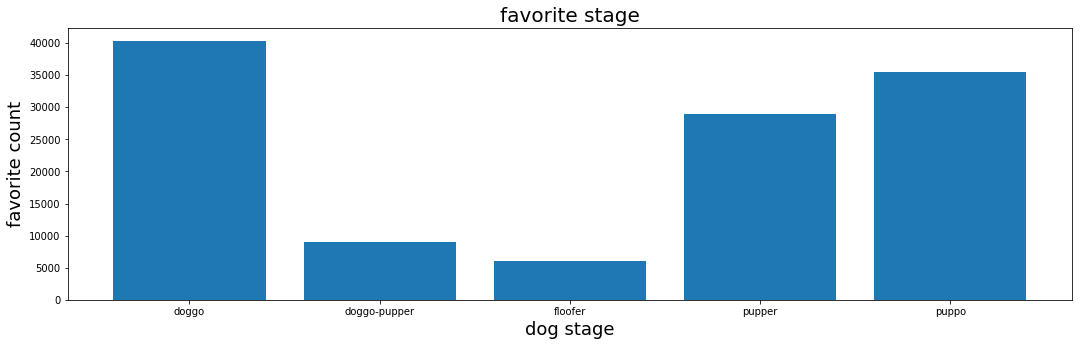

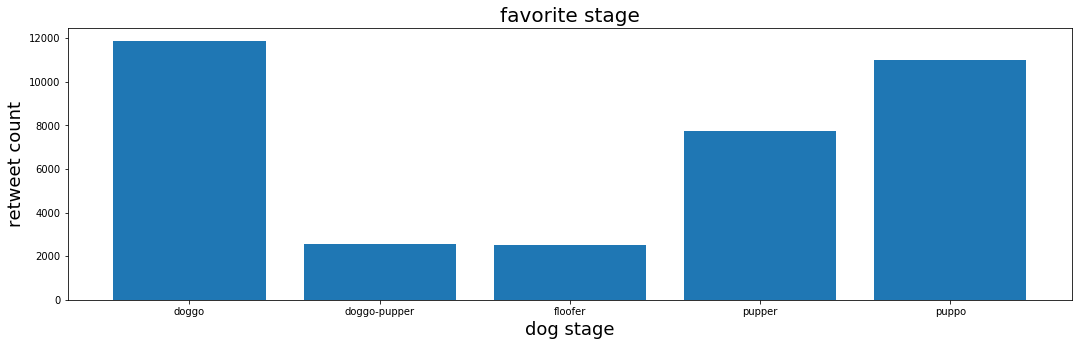

In [70]:
twitter_archive_master.dropna(inplace=True)
x=list(twitter_archive_master['dog_stage'])
y=list(twitter_archive_master['fav_count'])
plt.figure(figsize=(18,5))
plt.title('favorite stage',fontsize = 20)
plt.xlabel('dog stage' , fontsize = 18)
plt.ylabel('favorite count', fontsize = 18)
plt.bar(x,y);

twitter_archive_master.dropna(inplace=True)
x=list(twitter_archive_master['dog_stage'])
y=list(twitter_archive_master['retweet_count'])
plt.figure(figsize=(18,5))
plt.title('favorite stage',fontsize = 20)
plt.xlabel('dog stage' , fontsize = 18)
plt.ylabel('retweet count', fontsize = 18)
plt.bar(x,y);



#  high  favorite  count   to  which post ?


In [71]:
twitter_archive_master.fav_count.max()

40325

In [72]:
twitter_archive_master[twitter_archive_master['fav_count'] == 40325]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count,user_count
1122,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13.0,10.0,Cupid,doggo,40325,11878,3200892


# high retweet  count post  ?

In [73]:
twitter_archive_master.retweet_count.max()

11878

In [74]:
twitter_archive_master[twitter_archive_master['retweet_count'] == 11878]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count,user_count
1122,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13.0,10.0,Cupid,doggo,40325,11878,3200892


# relation between  rating and  fav_count

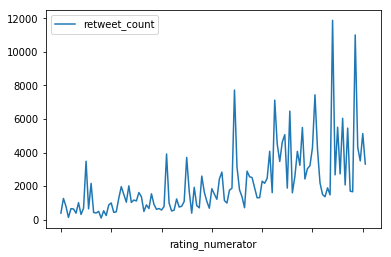

In [75]:

twitter_archive_master.plot(x='rating_numerator',y='retweet_count')

### retweet count and favorite count


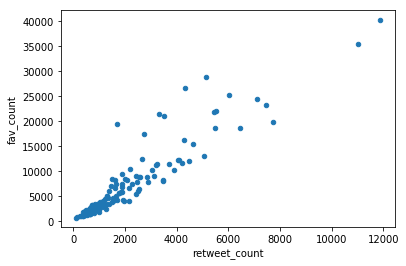

In [76]:
twitter_archive_master.plot(x= 'retweet_count'  ,y='fav_count' ,kind= 'scatter');


## most lovely post 

In [77]:
twitter_archive_master[twitter_archive_master['retweet_count'] > 6000 ]

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,fav_count,retweet_count,user_count
793,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,...,"<a href=""http://twitter.com/download/iphone"" r...","Meet Baloo. He's expecting a fast ground ball,...",https://twitter.com/dog_rates/status/740676976...,11.0,10.0,Baloo,pupper,19881,7724,3200851
942,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Chelsea. She forgot how to dog. 11/10 ...,https://twitter.com/dog_rates/status/773547596...,11.0,10.0,Chelsea,pupper,24553,7126,3200904
977,782305867769217024,https://pbs.twimg.com/media/CttPBt0WIAAcsDE.jpg,1,briard,0.504427,True,soft-coated_wheaten_terrier,0.390678,True,Lhasa,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He just graduated. Ready to b...,https://twitter.com/dog_rates/status/782305867...,12.0,10.0,Sampson,doggo,18630,6470,3200901
1066,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Craig. That's actually a normal sized ...,https://twitter.com/dog_rates/status/811386762...,11.0,10.0,Craig,pupper,23302,7444,3200895
1122,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Cupid. He was found in the trash. Now ...,https://twitter.com/dog_rates/status/826848821...,13.0,10.0,Cupid,doggo,40325,11878,3200892
1168,845306882940190720,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,1,Irish_water_spaniel,0.567475,True,Labrador_retriever,0.169496,True,curly-coated_retriever,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,https://twitter.com/dog_rates/status/845306882...,12.0,10.0,Pickles,pupper,25225,6039,3200891
1234,874012996292530176,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,2,Cardigan,0.806674,True,Pembroke,0.116622,True,kelpie,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13.0,10.0,Sebastian,puppo,35501,11007,3200891


### what is the most popular dog type ?
### golden_retriever, Labrador_retriever,Chihuahua

In [78]:
image_predictions_df_clean_1.prediction.value_counts()

golden_retriever                  177
Labrador_retriever                175
Chihuahua                         116
Pembroke                           96
Cardigan                           81
Pomeranian                         70
cocker_spaniel                     67
French_bulldog                     67
pug                                64
chow                               61
toy_poodle                         61
Chesapeake_Bay_retriever           55
Eskimo_dog                         52
Siberian_husky                     48
Pekinese                           47
kuvasz                             45
malamute                           42
Staffordshire_bullterrier          41
beagle                             40
kelpie                             39
German_shepherd                    35
miniature_poodle                   34
Samoyed                            32
miniature_pinscher                 32
collie                             32
Shetland_sheepdog                  31
bull_mastiff

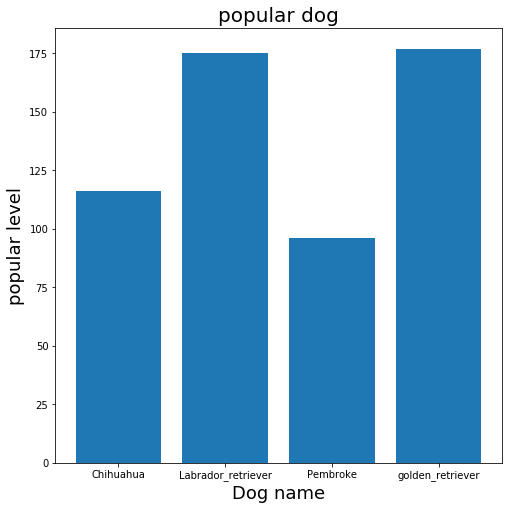

In [79]:
dog=['golden_retriever','Labrador_retriever','Chihuahua','Pembroke']
pred=[177,175,116,96]
plt.figure(figsize=(8,8))
plt.title('popular dog',fontsize = 20)
plt.xlabel('Dog name' , fontsize = 18)
plt.ylabel('popular level', fontsize = 18)
plt.bar(dog,pred);
